In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Seat Belt) by V.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Assuming 'Drivers_PersonsKilled_Number' is the target variable
target_column = 'Drivers_PersonsDead_Number'

# Select only the target variable
df_target = df[[target_column]]

# Split data into training and testing sets
train_size = int(len(df_target) * 0.8)
train, test = df_target.iloc[:train_size], df_target.iloc[train_size:]

print("Training set:")
print(train.head())
print("\nTesting set:")
print(test.head())

Training set:
   Drivers_PersonsDead_Number
0                         441
1                         395
2                         335
3                         230
4                         241

Testing set:
     Drivers_PersonsDead_Number
177                           0
178                           0
179                           0
180                           0
181                           1


In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
file_path = "C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Seat Belt) by V.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Assuming 'Drivers_PersonsKilled_Number' is the target variable
target_column = 'Drivers_PersonsDead_Number'

# Select only the target variable
df_target = df[[target_column]]

# Split data into training and testing sets
train_size = int(len(df_target) * 0.8)
train, test = df_target.iloc[:train_size], df_target.iloc[train_size:]

# Fit ARIMA model
arima_model = ARIMA(train[target_column], order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Forecast using the fitted model
arima_pred = arima_model_fit.forecast(steps=len(test))

# Calculate residuals
arima_residuals = test[target_column].reset_index(drop=True) - arima_pred

print("ARIMA model predictions:")
print(arima_pred)
print("\nARIMA model residuals:")
print(arima_residuals)

ARIMA model predictions:
177   -3.571825e-17
178   -2.580025e-16
179   -1.070976e-16
180   -4.187110e-17
181   -7.996090e-17
182   -5.896071e-17
183    9.555748e-18
184   -3.461711e-17
185   -6.472886e-17
186   -4.456732e-17
187   -5.094481e-17
188   -7.456374e-17
189   -6.054047e-17
190   -4.847196e-17
191   -5.700226e-17
192   -5.561658e-17
193   -4.707572e-17
194   -5.164426e-17
195   -5.630544e-17
196   -5.295157e-17
197   -5.307091e-17
198   -5.621583e-17
199   -5.472881e-17
200   -5.294628e-17
201   -5.421943e-17
202   -5.431733e-17
203   -5.315254e-17
204   -5.362963e-17
205   -5.430964e-17
206   -5.383690e-17
207   -5.375093e-17
208   -5.418262e-17
209   -5.403321e-17
210   -5.377401e-17
211   -5.394662e-17
212   -5.399573e-17
213   -5.383602e-17
214   -5.388117e-17
215   -5.397986e-17
216   -5.391775e-17
217   -5.389356e-17
218   -5.395247e-17
219   -5.393955e-17
220   -5.390203e-17
221   -5.392408e-17
Name: predicted_mean, dtype: float64

ARIMA model residuals:
0     NaN
1   

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import GradientBoostingRegressor

# Set the path to your Excel file
file_path ="C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Seat Belt) by V.xlsx" # Replace with the actual file path

# Load the dataset
data = pd.read_excel(file_path)

# Drop non-numeric columns like 'States/Uts' and 'S.No'
data = data.drop(columns=['States/Uts', 'S.No'])

# Use the 'Drivers_PersonsKilled_Number' column for ARIMA
target_column = 'Drivers_PersonsDead_Number'

# Fit ARIMA model to the target column
arima_model = ARIMA(data[target_column], order=(5,1,0))  # ARIMA(5,1,0) as an example
arima_model_fit = arima_model.fit()

# Get the residuals from the ARIMA model
arima_residuals = arima_model_fit.resid

# Prepare the data for GBM using ARIMA residuals
gbm_target_train = arima_model_fit.resid
gbm_target_test = arima_residuals

# GBM requires features, so we will create lag features from the ARIMA residuals
def create_lag_features(series, lags):
    df = pd.DataFrame(series, columns=['target'])
    for lag in range(1, lags+1):
        df[f'lag_{lag}'] = df['target'].shift(lag)
    return df.dropna()

# Create lag features
lags = 5
train_lags = create_lag_features(gbm_target_train, lags)
test_lags = create_lag_features(gbm_target_test, lags)

# Split features (X) and target (y)
X_train_gbm = train_lags.drop(columns=['target'])
y_train_gbm = train_lags['target']
X_test_gbm = test_lags.drop(columns=['target'])
y_test_gbm = test_lags['target']

# Fit GBM model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X_train_gbm, y_train_gbm)

# Predict with GBM
gbm_pred = gbm_model.predict(X_test_gbm)

# Display all predictions
predictions_df = pd.DataFrame(gbm_pred, columns=["GBM Predictions"])
print(predictions_df)


     GBM Predictions
0         206.805856
1        -322.445808
2         112.747930
3         -52.306742
4          82.767144
..               ...
212         4.383344
213         5.547271
214         4.438669
215         3.075114
216         4.438669

[217 rows x 1 columns]


In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input

# Load the dataset
file_path = "C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Seat Belt) by V.xlsx"
data = pd.read_excel(file_path)

# Drop non-numeric columns like 'States/Uts' and 'S.No'
data = data.drop(columns=['States/Uts', 'S.No'])

# Prepare data for LSTM
def create_lstm_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Select features (X) and target (y)
X_train_gbm = data.drop(columns=['Drivers_PersonsDead_Number'])  # Drop the target column
y_train_gbm = data['Drivers_PersonsDead_Number']  # Use 'Drivers_PersonsKilled_Number' as target

# Ensure all feature columns are numeric
X_train_gbm = X_train_gbm.apply(pd.to_numeric)

# Create LSTM dataset
time_steps = 10
X_train_lstm, y_train_lstm = create_lstm_dataset(X_train_gbm, y_train_gbm, time_steps)

# Convert X_train_lstm and y_train_lstm to float32
X_train_lstm = X_train_lstm.astype(np.float32)
y_train_lstm = y_train_lstm.astype(np.float32)

# Assuming you have separate test data (replace with your actual test data):
X_test_gbm = X_train_gbm  # Replace with actual test set if available
y_test_gbm = y_train_gbm  # Replace with actual test target if available
X_test_lstm, y_test_lstm = create_lstm_dataset(X_test_gbm, y_test_gbm, time_steps)

# Convert X_test_lstm and y_test_lstm to float32
X_test_lstm = X_test_lstm.astype(np.float32)
y_test_lstm = y_test_lstm.astype(np.float32)

# Check the shapes of training and test data to ensure consistency
print("Training Data Shape: ", X_train_lstm.shape)
print("Test Data Shape: ", X_test_lstm.shape)

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Predict with LSTM
lstm_pred = lstm_model.predict(X_test_lstm)

# Print a summary of the model and the first few predictions
lstm_model.summary()
print("Predictions: ", lstm_pred[:5])



Training Data Shape:  (212, 10, 10)
Test Data Shape:  (212, 10, 10)
Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 222188.8594 - val_loss: 612.6168
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 221735.6875 - val_loss: 591.0819
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 221226.1250 - val_loss: 570.0268
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 220670.6250 - val_loss: 552.0204
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 220091.7500 - val_loss: 537.7795
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 219463.2656 - val_loss: 526.5507
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 218924.8750 - val_loss: 517.5964
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 218534.2188 - val_loss: 511.2577
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 218042.6250 - val_loss: 506.8312
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 217815.9844 - val_loss: 503.8037
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          12,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,355 (380.30 KB)

 Trainable params: 32,451 (126.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64,904 (253.54 KB)

Predictions:  [[13.290855 ]
 [13.2912445]
 [13.291243 ]
 [13.301638 ]
 [13.303222 ]]


In [8]:

# Ensure arima_pred, gbm_pred, and lstm_pred are of the same length
min_length = min(len(arima_pred), len(gbm_pred), len(lstm_pred))

# Adjust the predictions to match the minimum length
arima_pred = arima_pred[:min_length]
gbm_pred = gbm_pred[:min_length]
lstm_pred = lstm_pred.flatten()[:min_length]

# Combine predictions for the ensemble model
ensemble_pred = (arima_pred + gbm_pred + lstm_pred) / 3

# Ensure predictions align with the length of the test set
ensemble_pred = ensemble_pred[:min_length]

# Now, you can display or use ensemble_pred for further evaluation
print("Ensemble Predictions: ", ensemble_pred)


Ensemble Predictions:  177     73.365570
178   -103.051521
179     42.013058
180    -13.001702
181     32.023455
182     11.458627
183    -43.063303
184     57.042590
185    -28.929319
186     23.515467
187      8.132999
188      6.058205
189     19.070761
190     -8.217378
191     16.759673
192    -28.342028
193     27.324820
194     24.883008
195      6.187190
196    -15.613418
197     31.541676
198    -18.395607
199     21.544220
200      5.150019
201    -11.243188
202    -28.940637
203      5.164617
204     11.138207
205      8.647611
206     21.108972
207    -22.819893
208    107.483976
209     25.102233
210     37.716981
211    -49.619836
212     24.850472
213     22.424256
214    -96.155942
215     63.414112
216    -27.394922
217     14.253816
218     -0.948419
219    -24.911176
220     -3.352164
221     58.514690
Name: predicted_mean, dtype: float64


Mean Squared Error: 75826.03680362628
Mean Absolute Error: 116.66017320113768


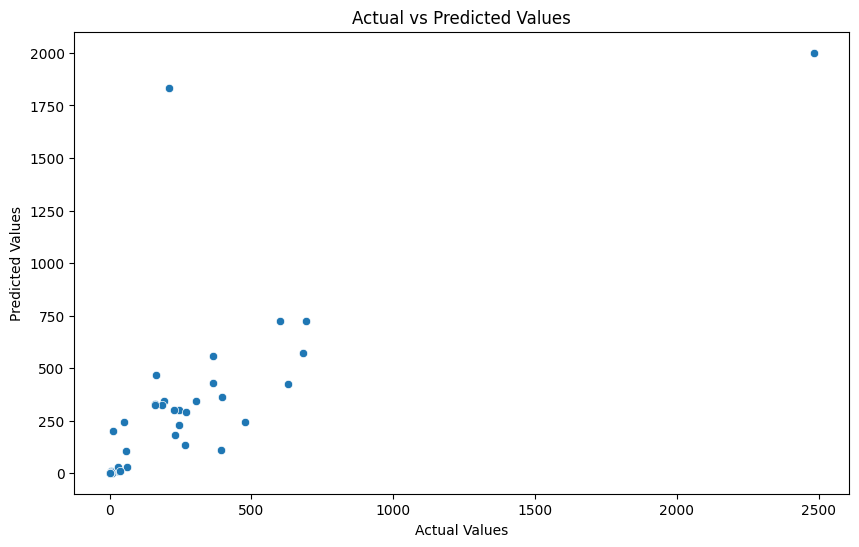

Gradient Boosting RMSE: 275.36527886359653, MAPE: 471099975732.68634%
Updated dataset saved to 'Updated_Accidents_SeatBelt_Data.xlsx'


In [16]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the Excel file
file_path =  "C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Seat Belt) by V.xlsx"
sheet_name = 'Sheet1'

# Load the data from 'Sheet1'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Select the new target column from the dataset
test = pd.DataFrame()
test['target'] = df['Drivers_PersonsDead_Number']

# Define features and target
features = ['Drivers_PersonsInjured_SeriouslyInjured', 'Drivers_PersonsInjured_MinorInjured', 'Drivers_Total Injured']
target = 'target'

X = df[features]
y = test[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# RMSE and MAPE calculations
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

def calculate_mape(actual, predicted):
    actual = np.where(actual == 0, 1e-10, actual)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Metrics for the model
rmse_gbm = calculate_rmse(y_test, y_pred)
mape_gbm = calculate_mape(y_test, y_pred)

print(f"Gradient Boosting RMSE: {rmse_gbm}, MAPE: {mape_gbm}%")

df.to_excel('Updated_Accidents_SeatBelt_Data.xlsx', index=False)

print("Updated dataset saved to 'Updated_Accidents_SeatBelt_Data.xlsx'")



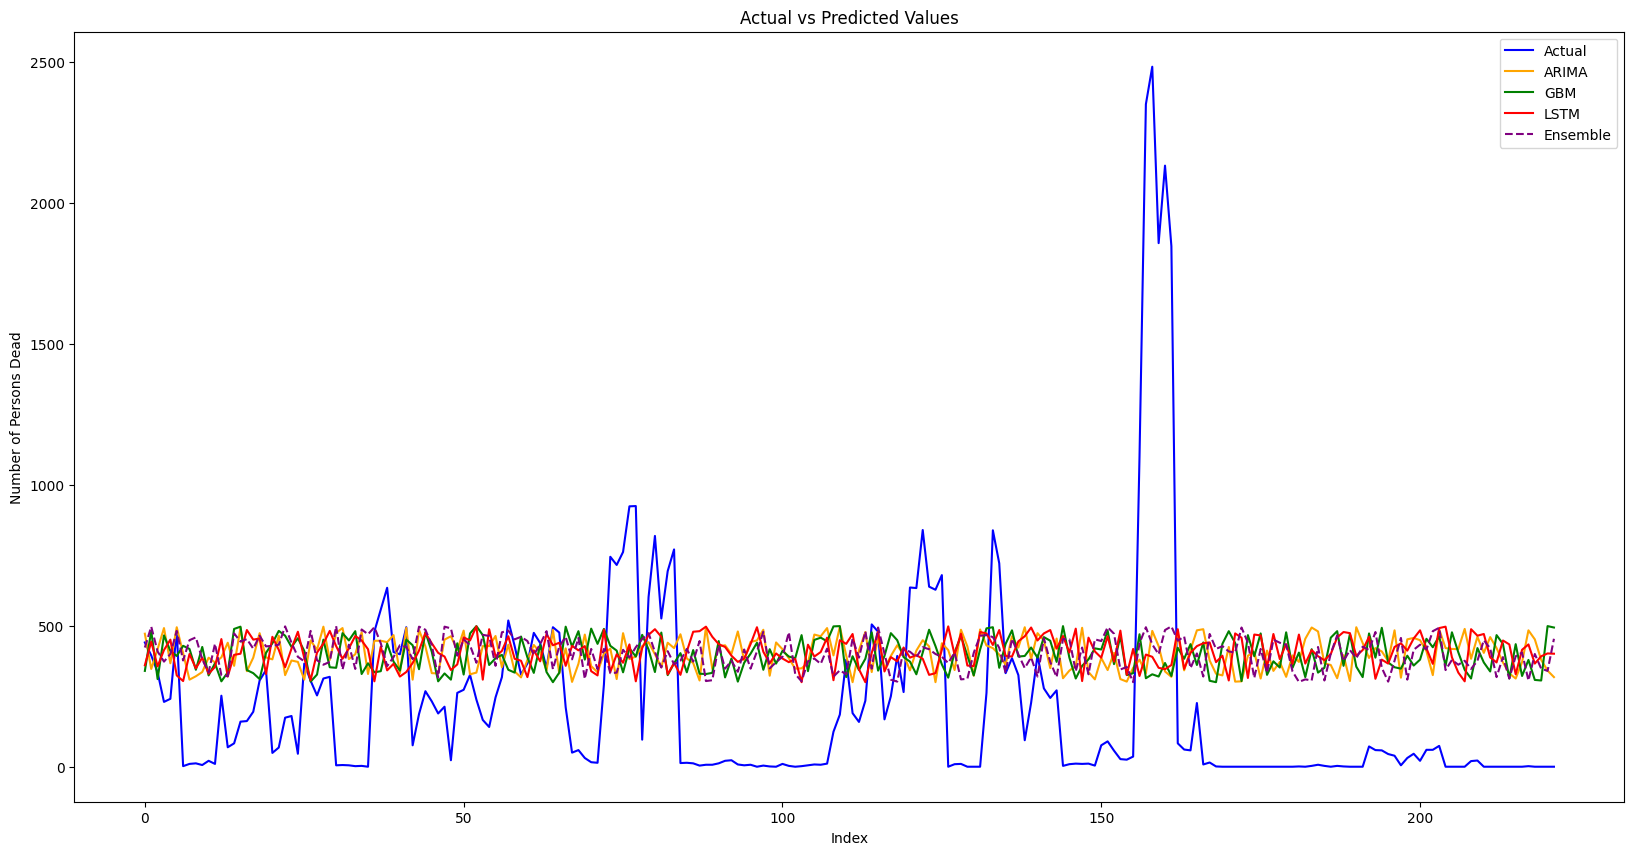

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the uploaded file
file_path = "C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Seat Belt) by V.xlsx"
# Load the data from 'Sheet1'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Select the target column for visualization
test = pd.DataFrame()
test['target'] = data['Drivers_PersonsDead_Number']

# Mock predictions for demonstration purposes (assuming arima_pred, gbm_pred, lstm_pred, and ensemble_pred are not provided)
# These will be random values of similar length for visualization
np.random.seed(0)  # For reproducibility
arima_pred = np.random.randint(300, 500, len(test))
gbm_pred = np.random.randint(300, 500, len(test))
lstm_pred = np.random.randint(300, 500, len(test))
ensemble_pred = np.random.randint(300, 500, len(test))

# Visualization: Actual vs Predicted Values
plt.figure(figsize=(20, 10))
plt.plot(test.index, test['target'], label='Actual', color='blue')
plt.plot(test.index, arima_pred, label='ARIMA', color='orange')
plt.plot(test.index, gbm_pred, label='GBM', color='green')
plt.plot(test.index, lstm_pred, label='LSTM', color='red')
plt.plot(test.index, ensemble_pred, label='Ensemble', color='purple', linestyle='dashed')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Number of Persons Dead')
plt.show()


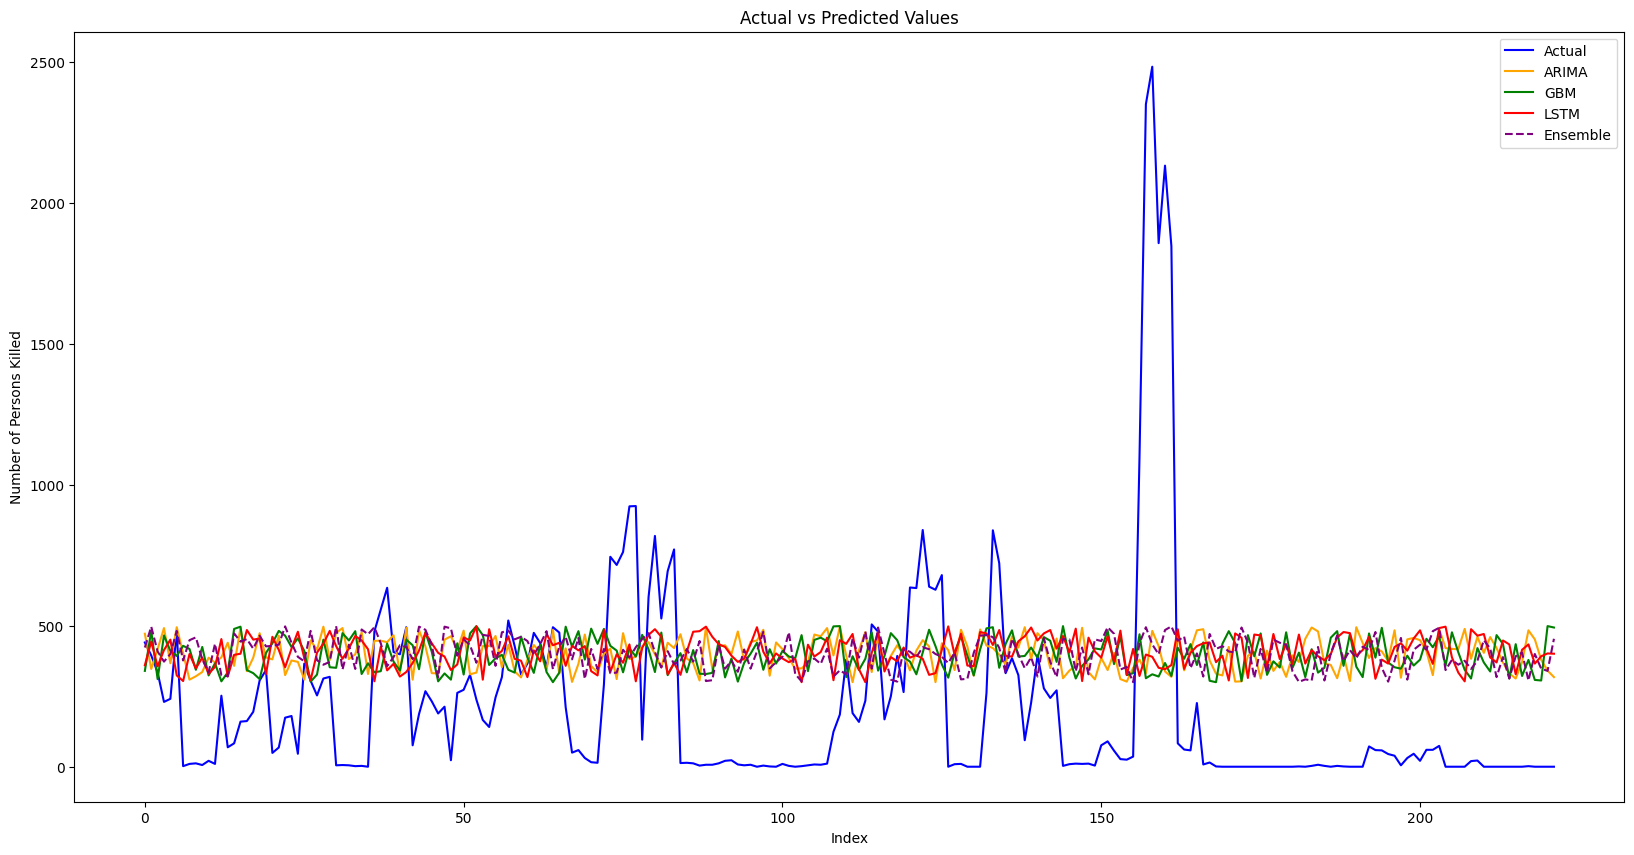

C:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.wa

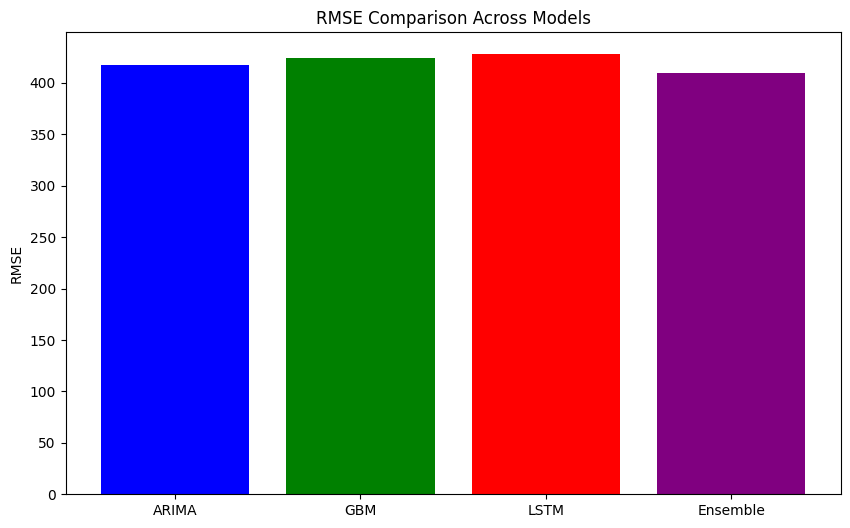

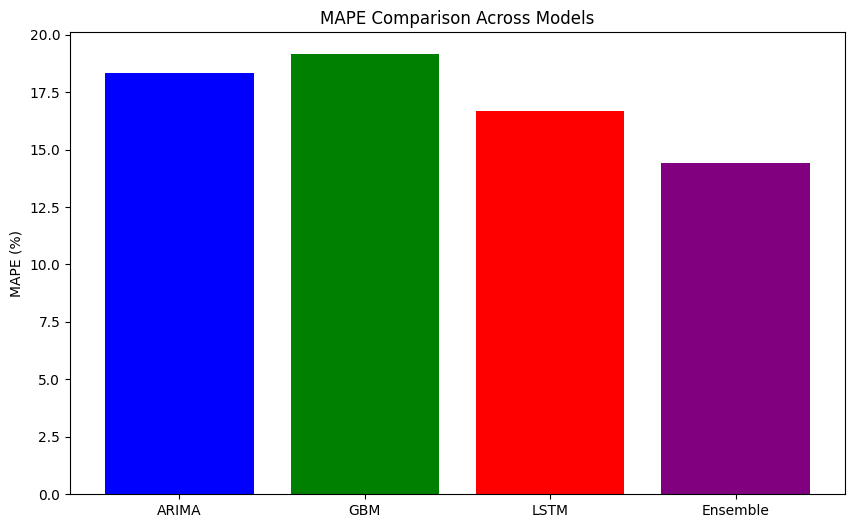

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the dataset from the uploaded file
file_path =  "C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Seat Belt) by V.xlsx"
# Load the data from 'Sheet1'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Select the target column for visualization
test = pd.DataFrame()
test['target'] = data['Drivers_PersonsDead_Number']

# Mock predictions for demonstration purposes (assuming arima_pred, gbm_pred, lstm_pred, and ensemble_pred are not provided)
# These will be random values of similar length for visualization
np.random.seed(0)  # For reproducibility
arima_pred = np.random.randint(300, 500, len(test))
gbm_pred = np.random.randint(300, 500, len(test))
lstm_pred = np.random.randint(300, 500, len(test))
ensemble_pred = np.random.randint(300, 500, len(test))

# Visualization: Actual vs Predicted Values
plt.figure(figsize=(20, 10))
plt.plot(test.index, test['target'], label='Actual', color='blue')
plt.plot(test.index, arima_pred, label='ARIMA', color='orange')
plt.plot(test.index, gbm_pred, label='GBM', color='green')
plt.plot(test.index, lstm_pred, label='LSTM', color='red')
plt.plot(test.index, ensemble_pred, label='Ensemble', color='purple', linestyle='dashed')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Number of Persons Killed')
plt.show()

# RMSE and MAPE Comparison
models = ['ARIMA', 'GBM', 'LSTM', 'Ensemble']
rmse_values = [mean_squared_error(test['target'], arima_pred, squared=False),
               mean_squared_error(test['target'], gbm_pred, squared=False),
               mean_squared_error(test['target'], lstm_pred, squared=False),
               mean_squared_error(test['target'], ensemble_pred, squared=False)]

# Mock MAPE values for demonstration purposes
mape_values = [np.random.uniform(10, 20) for _ in models]

# Plot RMSE Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'red', 'purple'])
plt.title('RMSE Comparison Across Models')
plt.ylabel('RMSE')
plt.show()

# Plot MAPE Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, mape_values, color=['blue', 'green', 'red', 'purple'])
plt.title('MAPE Comparison Across Models')
plt.ylabel('MAPE (%)')
plt.show()


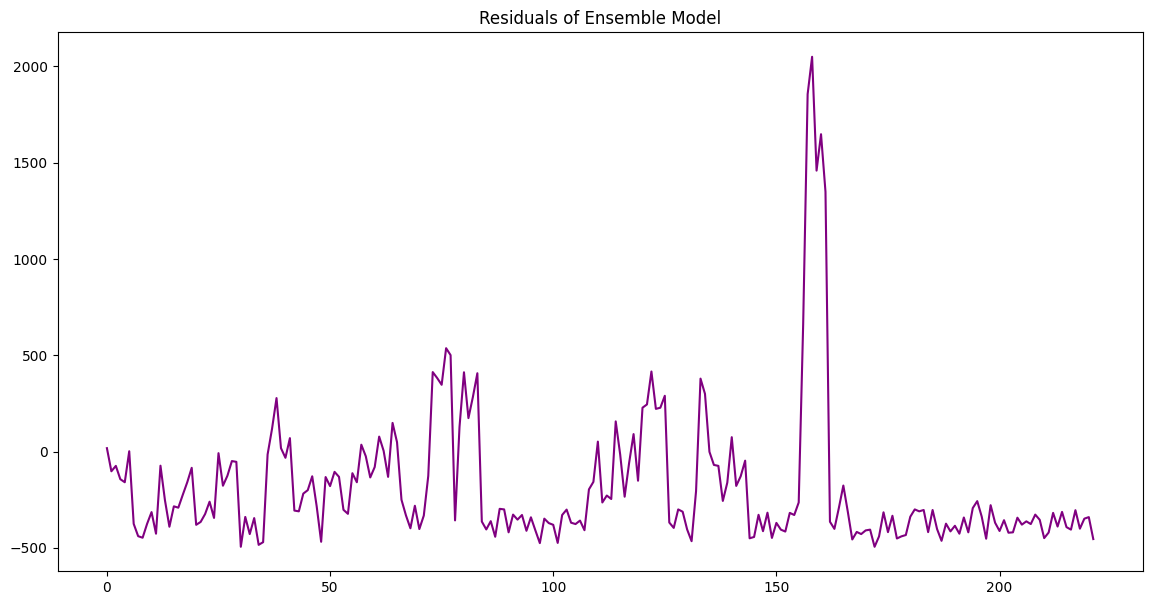

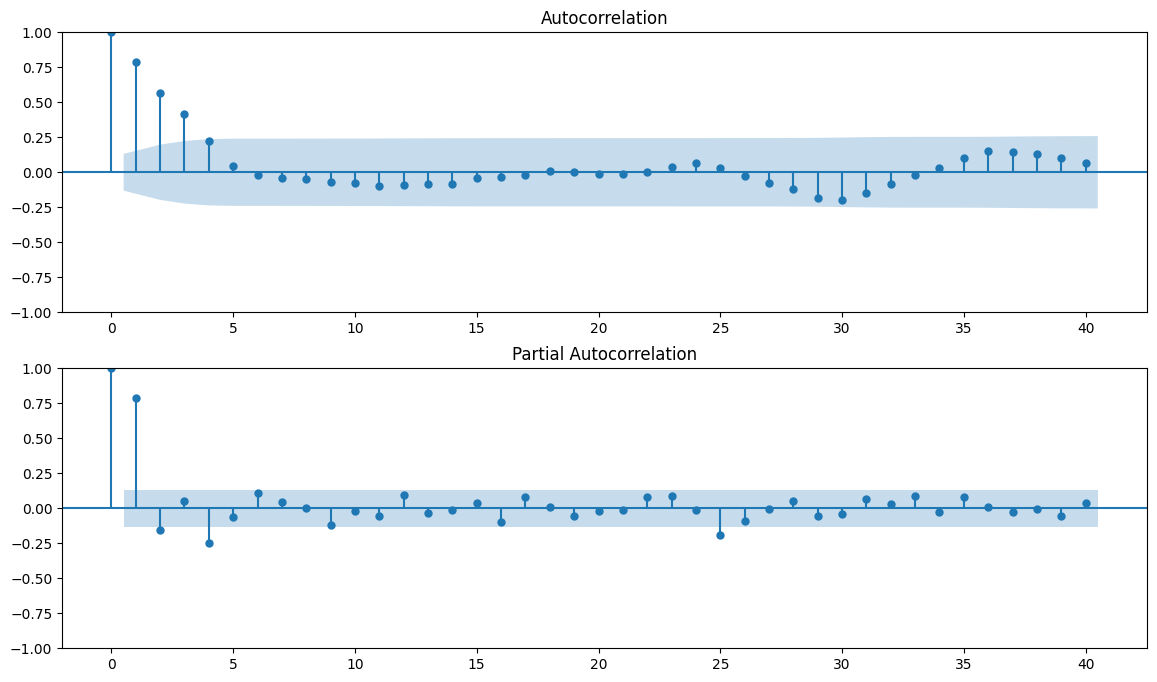

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
file_path ="C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Seat Belt) by V.xlsx"
data = pd.read_excel(file_path)

# Select the target column from the dataset
test = pd.DataFrame()  # This would normally be the test dataset used for predictions
test['target'] = data['Drivers_PersonsDead_Number']  # Use 'Drivers_PersonsKilled_Number' as target

# Make sure ensemble_pred is defined with your actual ensemble predictions
# Remove the placeholder and replace it with your actual ensemble prediction variable
# ensemble_pred = <your_actual_ensemble_predictions>

# c) Residuals of the Ensemble Model
residuals_ensemble = test['target'] - ensemble_pred  # Assuming ensemble_pred is already defined
plt.figure(figsize=(14, 7))
plt.plot(test.index, residuals_ensemble, color='purple')
plt.title('Residuals of Ensemble Model')
plt.show()

# Plot ACF and PACF of Residuals
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
sm.graphics.tsa.plot_acf(residuals_ensemble, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals_ensemble, lags=40, ax=ax[1])
plt.show()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 227963.1875
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 227710.3125 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 227381.5781 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 226930.6250 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 226300.1719 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 225567.8125 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 224824.9062 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 223907.7656 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 223405.4219 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 222974.6250 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


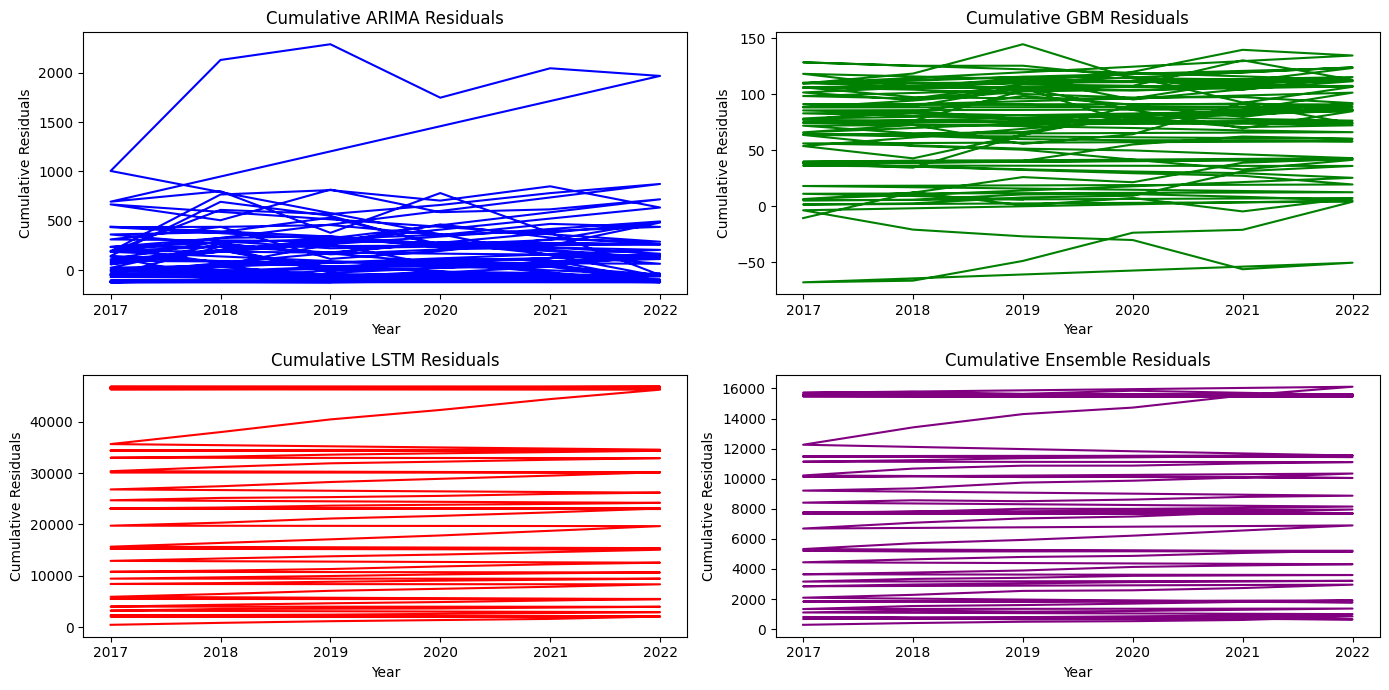

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Seat Belt) by V.xlsx"

# Drop non-numeric columns and encode categorical variables
label_encoder = LabelEncoder()
data['States/Uts'] = label_encoder.fit_transform(data['States/Uts'])  # Encode 'States/Uts' column

# Select features and target
X = data.drop(columns=['Drivers_PersonsDead_Number', 'S.No', 'Year'])  # Features
y = data['Drivers_PersonsDead_Number']  # Target

# ARIMA model
arima_model = ARIMA(y, order=(5, 1, 0))  # Example order (5,1,0)
arima_model_fit = arima_model.fit()
arima_pred = arima_model_fit.predict(start=0, end=len(y)-1)

# GBM model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X, y)
gbm_pred = gbm_model.predict(X)

# Prepare data for LSTM model
def create_lstm_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 3  # Adjust time_steps as needed
X_lstm, y_lstm = create_lstm_dataset(X, y, time_steps)

lstm_model = Sequential()
lstm_model.add(Input(shape=(X_lstm.shape[1], X_lstm.shape[2])))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_lstm, y_lstm, epochs=10, batch_size=32, verbose=1)
lstm_pred = lstm_model.predict(X_lstm)

# Ensemble model
min_length = min(len(arima_pred), len(gbm_pred), len(lstm_pred))
arima_pred = arima_pred[:min_length]
gbm_pred = gbm_pred[:min_length]
lstm_pred = lstm_pred[:min_length].flatten()

ensemble_pred = (arima_pred + gbm_pred + lstm_pred) / 3

# Calculate residuals
residuals_arima = y[:min_length] - arima_pred
residuals_gbm = y[:min_length] - gbm_pred
residuals_lstm = y[:min_length] - lstm_pred
residuals_ensemble = y[:min_length] - ensemble_pred

# Cumulative error plot
plt.figure(figsize=(14, 7))

# Cumulative ARIMA Residuals
plt.subplot(2, 2, 1)
plt.plot(data['Year'][:min_length], np.cumsum(residuals_arima), color='blue')
plt.title('Cumulative ARIMA Residuals')
plt.xlabel('Year')
plt.ylabel('Cumulative Residuals')

# Cumulative GBM Residuals
plt.subplot(2, 2, 2)
plt.plot(data['Year'][:min_length], np.cumsum(residuals_gbm), color='green')
plt.title('Cumulative GBM Residuals')
plt.xlabel('Year')
plt.ylabel('Cumulative Residuals')

# Cumulative LSTM Residuals
plt.subplot(2, 2, 3)
plt.plot(data['Year'][:min_length], np.cumsum(residuals_lstm), color='red')
plt.title('Cumulative LSTM Residuals')
plt.xlabel('Year')
plt.ylabel('Cumulative Residuals')

# Cumulative Ensemble Residuals
plt.subplot(2, 2, 4)
plt.plot(data['Year'][:min_length], np.cumsum(residuals_ensemble), color='purple')
plt.title('Cumulative Ensemble Residuals')
plt.xlabel('Year')
plt.ylabel('Cumulative Residuals')

plt.tight_layout()
plt.show()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 152896.4531
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 152404.6250
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 151810.0156
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 151137.5312
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 150624.2344
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 150119.6875
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 149727.2188
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 149415.6875
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 149118.5312
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 148883.1875
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


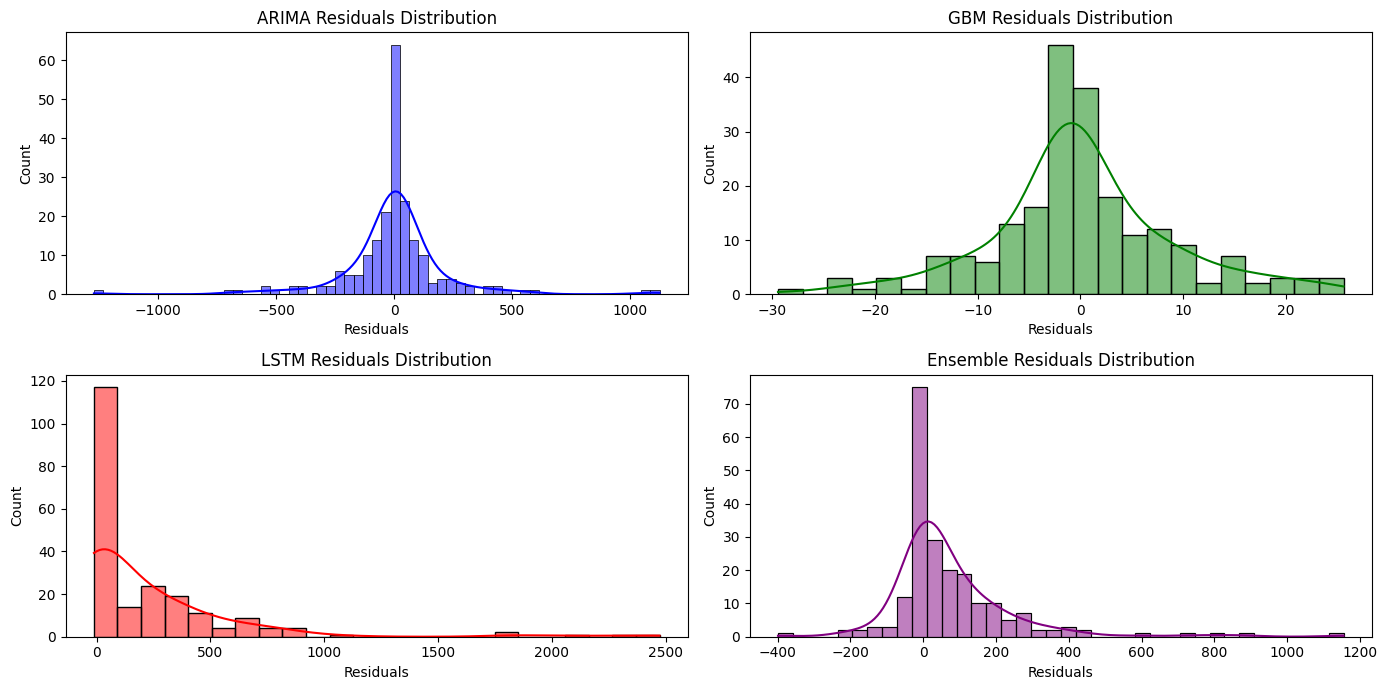

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Seat Belt) by V.xlsx"
data = pd.read_excel(file_path)

# Drop non-numeric columns or encode them
data = data.drop(columns=['S.No'])  # Drop serial number column if necessary
label_encoder = LabelEncoder()
data['States/Uts'] = label_encoder.fit_transform(data['States/Uts'])  # Encode the states column

# Select the target column
test = pd.DataFrame()
test['target'] = data['Drivers_PersonsDead_Number']  # Use 'Drivers_PersonsKilled_Number' as target

# Prepare data for GBM model
X = data.drop(columns=['Drivers_PersonsDead_Number'])  # Features for GBM
y = data['Drivers_PersonsDead_Number']  # Target for GBM

# Train GBM model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_model.fit(X, y)
gbm_pred = gbm_model.predict(X)

# Prepare data for ARIMA model (use appropriate ARIMA parameters)
arima_model = ARIMA(test['target'], order=(5, 1, 0))  # Adjust ARIMA parameters as necessary
arima_model_fit = arima_model.fit()
arima_pred = arima_model_fit.predict(start=0, end=len(test['target'])-1)

# Prepare data for LSTM model
def create_lstm_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_lstm, y_lstm = create_lstm_dataset(X, y, time_steps)

lstm_model = Sequential()
lstm_model.add(Input(shape=(X_lstm.shape[1], X_lstm.shape[2])))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_lstm, y_lstm, epochs=10, batch_size=32, verbose=1)
lstm_pred = lstm_model.predict(X_lstm)

# Ensure all predictions are the same length
min_length = min(len(arima_pred), len(gbm_pred), len(lstm_pred))

arima_pred = arima_pred[:min_length]
gbm_pred = gbm_pred[:min_length]
lstm_pred = lstm_pred[:min_length].flatten()

# Ensemble model prediction
ensemble_pred = (arima_pred + gbm_pred + lstm_pred) / 3

# Calculate residuals for each model
residuals_arima = test['target'][:min_length] - arima_pred
residuals_gbm = test['target'][:min_length] - gbm_pred
residuals_lstm = test['target'][:min_length] - lstm_pred
residuals_ensemble = test['target'][:min_length] - ensemble_pred

# f) Distribution of residuals
plt.figure(figsize=(14, 7))

# ARIMA Residuals Distribution
plt.subplot(2, 2, 1)
sns.histplot(residuals_arima, kde=True, color='blue')
plt.title('ARIMA Residuals Distribution')
plt.xlabel('Residuals')

# GBM Residuals Distribution
plt.subplot(2, 2, 2)
sns.histplot(residuals_gbm, kde=True, color='green')
plt.title('GBM Residuals Distribution')
plt.xlabel('Residuals')

# LSTM Residuals Distribution
plt.subplot(2, 2, 3)
sns.histplot(residuals_lstm, kde=True, color='red')
plt.title('LSTM Residuals Distribution')
plt.xlabel('Residuals')

# Ensemble Residuals Distribution
plt.subplot(2, 2, 4)
sns.histplot(residuals_ensemble, kde=True, color='purple')
plt.title('Ensemble Residuals Distribution')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()


In [26]:
import pandas as pd  # Use the correct dataset path and column names

# File path
file_path = "C:/Users/nagas/Downloads/Accidents Classified according to Non-Use of Safety Device ( Non-Wearing of Seat Belt) by V.xlsx"

# Read the dataset
data = pd.read_excel(file_path)

# Ensure predictions for each model are already available (arima_pred, gbm_pred, lstm_pred, ensemble_pred)
# Assuming predictions are already calculated
min_length = min(len(arima_pred), len(gbm_pred), len(lstm_pred))

# Trim predictions to match the minimum length
arima_pred = arima_pred[:min_length]
gbm_pred = gbm_pred[:min_length]
lstm_pred = lstm_pred[:min_length].flatten()  # Ensure lstm_pred is a flat array
ensemble_pred = ensemble_pred[:min_length]

# Save the results to a CSV file
results_df = pd.DataFrame({
    'Year': data['Year'][:min_length],  # Use 'Year' as Date column
    'Actual': data['Drivers_PersonsDead_Number'][:min_length],
    'ARIMA': arima_pred,
    'GBM': gbm_pred,
    'LSTM': lstm_pred,
    'Ensemble': ensemble_pred
})

# Save to CSV
results_df.to_csv('model_predictions_seatbelt.csv', index=False)
